In [2]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [20]:
googl = yf.Ticker('GOOGL')
df=googl.history(start='2021-12-02',end='2022-01-01')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-01,2880.000000,2919.010010,2818.239990,2821.030029,1701000,0,0
2021-12-02,2825.000000,2877.290039,2804.290039,2859.320068,1459700,0,0
2021-12-03,2873.620117,2888.000000,2806.020020,2840.030029,2060800,0,0
2021-12-06,2860.810059,2877.050049,2803.000000,2863.100098,1530900,0,0
2021-12-07,2911.929932,2950.620117,2904.550049,2945.389893,1612000,0,0
2021-12-08,2951.929932,2967.860107,2928.120117,2963.729980,1213500,0,0
2021-12-09,2951.820068,2982.000000,2942.300049,2952.770020,1163500,0,0
2021-12-10,2974.000000,2979.550049,2934.080078,2960.030029,1222900,0,0
2021-12-13,2955.629883,2959.399902,2910.350098,2916.530029,1353500,0,0


In [21]:
actual_price = df.tail(1)
actual_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-31,2921.0,2933.969971,2897.040039,2897.040039,906200,0,0


In [22]:
df = df.head(len(df)-1) 
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-01,2880.000000,2919.010010,2818.239990,2821.030029,1701000,0,0
2021-12-02,2825.000000,2877.290039,2804.290039,2859.320068,1459700,0,0
2021-12-03,2873.620117,2888.000000,2806.020020,2840.030029,2060800,0,0
2021-12-06,2860.810059,2877.050049,2803.000000,2863.100098,1530900,0,0
2021-12-07,2911.929932,2950.620117,2904.550049,2945.389893,1612000,0,0
2021-12-08,2951.929932,2967.860107,2928.120117,2963.729980,1213500,0,0
2021-12-09,2951.820068,2982.000000,2942.300049,2952.770020,1163500,0,0
2021-12-10,2974.000000,2979.550049,2934.080078,2960.030029,1222900,0,0
2021-12-13,2955.629883,2959.399902,2910.350098,2916.530029,1353500,0,0


In [23]:
days = list() 
adj_close_prices = list()

In [24]:
df['Date'] = df.index
df['day'] = df['Date'].dt.day
df_adj_close = df.loc[:, 'Close'] 
df_days = df.loc[:, 'day']
df_days

/var/folders/5c/0gkvjclj5zbd_1m1d92k5hz40000gn/T/ipykernel_56414/2834535897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df.index
/var/folders/5c/0gkvjclj5zbd_1m1d92k5hz40000gn/T/ipykernel_56414/2834535897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['Date'].dt.day


Date
2021-12-01     1
2021-12-02     2
2021-12-03     3
2021-12-06     6
2021-12-07     7
2021-12-08     8
2021-12-09     9
2021-12-10    10
2021-12-13    13
2021-12-14    14
2021-12-15    15
2021-12-16    16
2021-12-17    17
2021-12-20    20
2021-12-21    21
2021-12-22    22
2021-12-23    23
2021-12-27    27
2021-12-28    28
2021-12-29    29
2021-12-30    30
Name: day, dtype: int64

In [25]:
for day in df_days:
   days.append([int(day)])
#Create the dependent data set
for adj_close_price in df_adj_close:
   adj_close_prices.append(float(adj_close_price))
print(days)

[[1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [27], [28], [29], [30]]


In [26]:
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

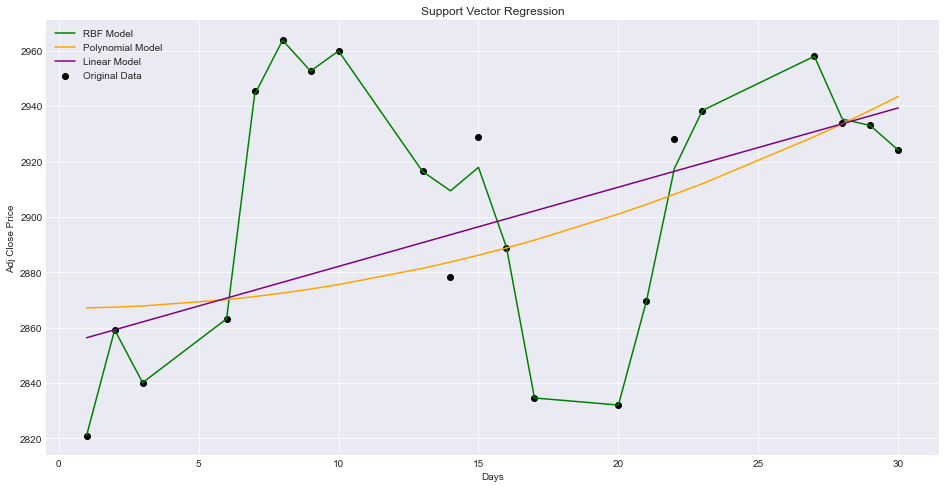

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [28]:
day = [[11]]
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [2971.70823459]
The Linear SVR predicted: [2884.98081055]
The Polynomial SVR predicted: [2877.33287983]
